<a href="https://colab.research.google.com/github/anpaschool/deep-learning/blob/master/DeepNeuralNetwork.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Neural Net in TensorFlow 2.0

For classifying MNIST digits. 

_Remember to change your Runtime to GPU or TPU._

#### Load dependencies

In [38]:
#pip install tensorflow==2.0.0-beta0
#pip install --upgrade tensorflow==2.0.0-beta0

In [39]:
import tensorflow as tf
import seaborn as sns
from tensorflow import keras

In [40]:
!pip freeze | grep tensorflow

tensorflow==2.0.0b0
tensorflow-estimator==1.13.0


#### Load data

In [41]:
(X_train, y_train), (X_valid, y_valid) = keras.datasets.mnist.load_data()

In [42]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

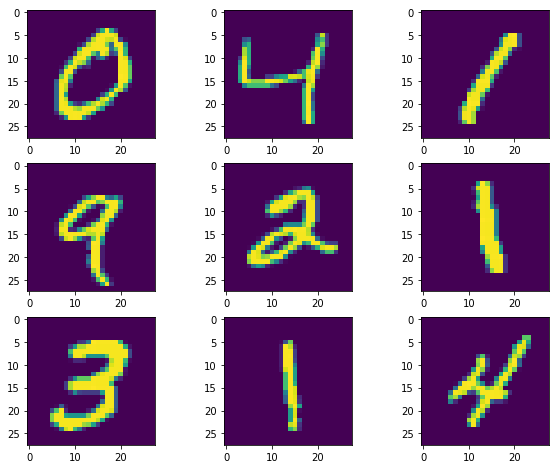

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = [10,8])
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(X_train[i].reshape(28,28))
plt.show()

#### Preprocess data

In [44]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_valid = X_valid.reshape(10000, 28, 28, 1).astype('float32')

#### Data Normalization

In [45]:
X_train /= 255
X_valid /= 255

#### Prepare Labels

In [46]:
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_valid = keras.utils.to_categorical(y_valid, n_classes)

In [47]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

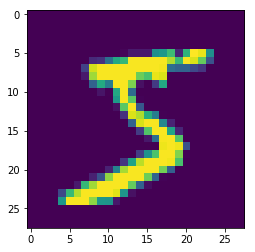

In [48]:
plt.imshow(X_train[0].reshape(28,28))

#### Design neural network architecture

```

model
   = keras.models.sequential([
       keras.layer.layerType(parameters...),
       keras.layer.layerType(parameters...),
       keras.layer.layerType(parameters...),
       keras.layer.layerType(parameters...)
   ])
   
```

In [49]:
model = keras.models.Sequential([
    
    keras.layers.Conv2D(32,\
                        kernel_size=(3, 3),\
                        activation='relu',\
                        input_shape=(28, 28, 1)),
    
    keras.layers.Conv2D(64,\
                        kernel_size=(3, 3),\
                        activation='relu'),
    
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(128,\
                       activation='relu'),
    
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(10,\
                       activation='softmax'),
])

In [50]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

#### Configure model

In [51]:
model.compile(loss='categorical_crossentropy',\
              optimizer='adam',\
              metrics=['accuracy'])

#### Train!

In [52]:
model.fit(X_train, y_train,\
          batch_size=128,\
          epochs=10,\
          verbose=1,\
          validation_data=(X_valid, y_valid))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.1749 - accuracy: 0.9475 - val_loss: 0.0525 - val_accuracy: 0.9835
Epoch 2/10
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.0513 - accuracy: 0.9840 - val_loss: 0.0374 - val_accuracy: 0.9867
Epoch 3/10
60000/60000 [==============================] - 68s 1ms/sample - loss: 0.0348 - accuracy: 0.9893 - val_loss: 0.0315 - val_accuracy: 0.9890
Epoch 4/10
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.0250 - accuracy: 0.9922 - val_loss: 0.0314 - val_accuracy: 0.9892
Epoch 5/10
60000/60000 [==============================] - 72s 1ms/sample - loss: 0.0185 - accuracy: 0.9940 - val_loss: 0.0286 - val_accuracy: 0.9911
Epoch 6/10
60000/60000 [==============================] - 72s 1ms/sample - loss: 0.0162 - accuracy: 0.9944 - val_loss: 0.0314 - val_accuracy: 0.9896
Epoch 7/10
60000/60000 [==============================] 

#### Performing Inference

In [65]:
valid_0 = X_valid[0].reshape(1,28,28,1)

In [66]:
model.predict(valid_0)

array([[1.7484308e-13, 2.0544870e-11, 4.0789710e-13, 2.3570415e-10,
        6.2883991e-16, 1.8546842e-14, 1.1069190e-17, 1.0000000e+00,
        4.4510281e-12, 2.4049069e-09]], dtype=float32)

In [67]:
model.predict_classes(valid_0)

array([7])

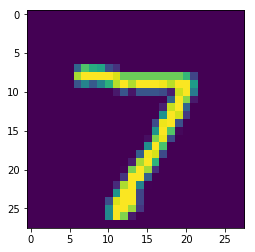

In [68]:
plt.imshow(valid_0.reshape(28,28))